# Age Dataset

In [122]:
#Required Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import exposure
import os
import cv2
import numpy as np
from skimage import io, color, feature, exposure
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score

In [2]:
# Function to extract HOG features from an image and visualize it
def extract_hog_features(image):
    # Convert the image to grayscale
    gray_image = color.rgb2gray(image)

    # Calculate HOG features
    hog_features, hog_image = feature.hog(gray_image, visualize=True)

    # Enhance the contrast of the HOG image for better visualization
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

    return hog_features, hog_image_rescaled

In [ ]:


# Path to the root folder of your dataset
class_folder = "D:/fcai/Level 3/ML/section/age/part2"

# List all subdirectories (assuming each subdirectory corresponds to a class)
features_list=[]
labels_list=[]
age = []
gender = []
race = []
#date_time = []

for image_filename in os.listdir(class_folder):
    image_path = os.path.join(class_folder, image_filename)
    
    #append age and geder and race for each image
    p = (image_filename.split('.')[0]).split('_')
    age.append(p[0])
    gender.append(p[1])
    race.append(p[2])
    #date_time.append(p[3])

    # Load the image
    image = io.imread(image_path)
    #resize image into same saize 64*128
    image = cv2.resize(image, (64,64))

    # Extract HOG features and visualize
    hog_features, hog_image = extract_hog_features(image)

    # Display the original image and the HOG features
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(2, 2), sharex=True, sharey=True)

    ax1.axis('off')
    ax1.imshow(image, cmap=plt.cm.gray)

    ax2.axis('off')
    ax2.imshow(hog_image, cmap=plt.cm.gray)

    plt.show()

    # Append HOG features to the features list
    features_list.append(hog_features)

    #not important
    # Append the label to the labels list
    labels_list.append(class_folder)



In [14]:
# Convert lists to NumPy arrays
features_array = np.array(features_list)
labels_array = np.array(labels_list)

#not important
# Use LabelEncoder to convert class names into numeric labels
label_encoder = LabelEncoder()
numeric_labels = label_encoder.fit_transform(labels_array)

print("\n*********************\n")
print(len(features_array))



*********************

10719


In [15]:
# Convert 'age' list to numpy array
age_array = np.array(age).reshape(-1, 1)  # Reshape as a column vector

# Convert 'gender' list to numpy array
gender_array = np.array(gender).reshape(-1, 1)  # Reshape as a column vector

# Convert 'race' list to numpy array
race_array = np.array(race).reshape(-1, 1)  # Reshape as a column vector

# Convert 'date_time' list to numpy array
#date_time_array = np.array(date_time).reshape(-1, 1)  # Reshape as a column vector


# Create the dataset by horizontally stacking age_array with features_array
dataset = np.hstack((age_array,gender_array, race_array,features_array))

# Convert dataset to a pandas DataFrame
column_names = ['Age']+['Gender'] +['Race']  + [f'Feature_{i}' for i in range(features_array.shape[1])]  # Creating column names
df = pd.DataFrame(dataset, columns=column_names)

In [16]:
# save dataset in my drive 
df.to_csv('age.csv', index=False)

In [128]:
#load data from my devise 
dataset = pd.read_csv('age.csv')
dataset.head()

,Age,Gender,Race,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,...,Feature_2906,Feature_2907,Feature_2908,Feature_2909,Feature_2910,Feature_2911,Feature_2912,Feature_2913,Feature_2914,Feature_2915
0,100,0.0,0,0.056609,0.000000,0.001515,0.000000,0.019136,0.000000,0.016670,...,0.069617,0.080303,0.004545,0.005618,0.000000,0.042494,0.016757,0.228633,0.196855,0.031999
1,100,0.0,0,0.042901,0.002273,0.011000,0.000000,0.025722,0.004096,0.012266,...,0.115580,0.023702,0.014231,0.029475,0.006221,0.023509,0.009745,0.005613,0.016045,0.010350
2,100,1.0,0,0.022902,0.011217,0.026766,0.015443,0.013108,0.000000,0.002320,...,0.033012,0.114906,0.029399,0.033613,0.037842,0.092043,0.098900,0.089084,0.034604,0.106260
3,100,1.0,0,0.014351,0.019590,0.040954,0.035465,0.018366,0.000000,0.000000,...,0.070161,0.064481,0.232191,0.087832,0.065605,0.046017,0.017663,0.008911,0.000893,0.034668
4,100,1.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# Sum all image features

In [105]:
#sum all image features
features_sum = np.sum(features_array, axis=1).tolist()
print(len(features_sum))
print(features_sum[:20])
print("\n-------------------\n")
print(age[:20])

10719
[250.79485101882142, 254.46574678248038, 260.53211465762104, 261.63805712719375, 196.37063070704153, 250.77893367252932, 261.26915470018196, 237.1213169368985, 258.4332050072354, 256.56600983250274, 265.27199912839717, 251.14244001003237, 261.0481638683299, 257.0395927919621, 236.24207366094674, 229.423091462944, 222.30717560379014, 243.51685342180912, 237.80667640827932, 227.93872451760467]

-------------------

['100', '100', '100', '100', '100', '100', '100', '100', '101', '103', '105', '105', '105', '105', '105', '10', '10', '10', '10', '10']


In [106]:
# new dataset after sum image features
data = {'Age':age ,'Gender':gender ,'Race':race , 'Featurs': features_sum}
df = pd.DataFrame(data)

df.head(2)

,Age,Gender,Race,Featurs
0,100,0,0,250.794851
1,100,0,0,254.465747


In [107]:
# save dataset after sum all imge features in my drive 
df.to_csv('age_fter_sum.csv', index=False)

In [108]:
#load data from my devise 
df = pd.read_csv('age_fter_sum.csv')
df.head()

,Age,Gender,Race,Featurs
0,100,0.0,0,250.794851
1,100,0.0,0,254.465747
2,100,1.0,0,260.532115
3,100,1.0,0,261.638057
4,100,1.0,0,196.370631


In [109]:
df.shape

(10719, 4)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10719 entries, 0 to 10718
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Age      10719 non-null  int64  
 1   Gender   10718 non-null  float64
 2   Race     10719 non-null  int64  
 3   Featurs  10719 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 335.1 KB


In [111]:
#fill NaN value by Medain
df = df.fillna(df.median())

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10719 entries, 0 to 10718
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Age      10719 non-null  int64  
 1   Gender   10719 non-null  float64
 2   Race     10719 non-null  int64  
 3   Featurs  10719 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 335.1 KB


In [113]:
# normaliz Age and Features and Gender and race
df['Age'] = MinMaxScaler(feature_range=(0,1)).fit_transform(df[['Age']])
df['Featurs'] = MinMaxScaler(feature_range=(0,1)).fit_transform(df[['Featurs']])
# df['Gender'] = MinMaxScaler(feature_range=(0,1)).fit_transform(df[['Featurs']])
# df['Race'] = MinMaxScaler(feature_range=(0,1)).fit_transform(df[['Featurs']])

In [114]:
df.head()

,Age,Gender,Race,Featurs
0,0.86087,0.0,0,0.739817
1,0.86087,0.0,0,0.763805
2,0.86087,1.0,0,0.803445
3,0.86087,1.0,0,0.810672
4,0.86087,1.0,0,0.384186


In [115]:
#spliot into featurs and target 
data_x = df.drop(dataset.columns[1], axis=1)  #Featurs all expect gender 
data_y = df.iloc[:, 1]   #Target only gender

In [116]:
# split into Train and Test
x_train, x_test, y_train, y_test = train_test_split(data_x,data_y,test_size=0.20,random_state=44)

# [1]K-Means 

In [117]:
# K-Means 
#useed orginal dataset not need to split dataset
km = KMeans(n_clusters=2, random_state=44)
y_pred = km.fit_predict(df)

C:\Users\iRepair\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [118]:
# Calculating the silhouette score
silhouette_avg = silhouette_score(df, km.labels_)
print(f"The Inertia: {km.inertia_}")
print(f"The silhouette score is: {silhouette_avg}")

The Inertia: 15865.340311550997
The silhouette score is: 0.9999067077152719


C:\Users\iRepair\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\iRepair\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\iRepair\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\iRepair\anaconda3\Lib\site-packages\sklearn\base.py:1151: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to

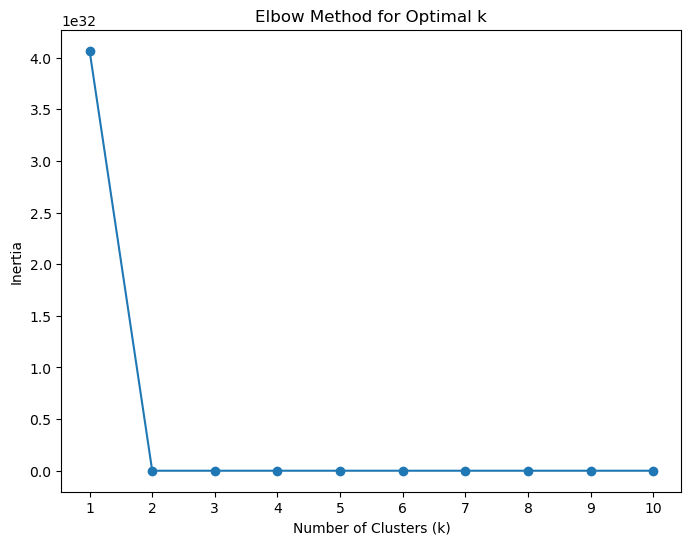

In [119]:
#Elbow Method
k=2
inertia = []
for k in range(1, 11):
    kmean = KMeans(n_clusters=k, random_state=42)
    kmean.fit(df)
    inertia.append(kmean.inertia_)

# Plotting the Elbow Method curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.show()

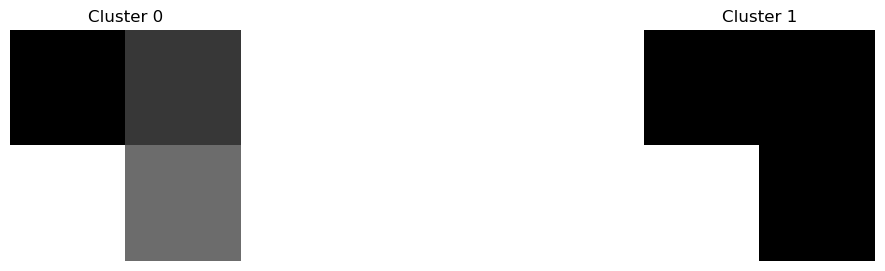

In [120]:
# Visualize the cluster centers (representative images)
k=2
fig, ax = plt.subplots(1, k, figsize=(15, 3))
for i in range(k):
    center_image = kmeans.cluster_centers_[i].reshape(2,2)  # Reshape to original dimensions
    ax[i].imshow(center_image, cmap='gray')
    ax[i].axis('off')
    ax[i].set_title(f'Cluster {i}')

plt.show()